In [4]:
import os
import sys
import pandas as pd
import scipy.stats as scs
import spei as si
import matplotlib.pyplot as plt

sys.path.append('/home/pooya/w/DroughtMonitoringIran/')

data_path = "./assets/data/"

In [88]:
csv_data_files_list = [f for f in os.listdir(path=data_path) if f.endswith(".csv")]

data = pd.DataFrame()

for f in csv_data_files_list:
    tmp = pd.read_csv(filepath_or_buffer=data_path + f)
    data = pd.concat([data, tmp])

data_daily = data[['Site', 'Year', 'Month', 'Day', 'rrr']].copy()
data_daily.rename(
    columns={
        'rrr': 'Precip'
    },
    inplace=True
)
data_daily.loc[:, 'Date'] = pd.to_datetime(
    data_daily[['Year', 'Month', 'Day']],
    errors='coerce'
)

data_daily = data_daily[['Site', 'Date', 'Precip']]

data_daily = data_daily.set_index(['Site', 'Date'])

data_monthly = data_daily.reset_index(level='Site')\
    .groupby('Site')\
    .resample('ME')\
    .agg({'Precip': lambda x: x.sum(min_count=15)})

In [89]:
print(data_daily.info())

print(data_daily[data_daily['Precip'].isna()])

data_daily

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 87660 entries, (np.int64(40736), Timestamp('1959-01-01 00:00:00')) to (np.int64(40719), Timestamp('2018-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  87544 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB
None
                  Precip
Site  Date              
40732 1961-03-17     NaN
      1961-03-18     NaN
      1979-02-07     NaN
      1979-02-12     NaN
      1979-02-13     NaN
...                  ...
40719 1982-01-25     NaN
      1982-01-26     NaN
      1982-01-27     NaN
      1982-01-31     NaN
      1982-02-01     NaN

[116 rows x 1 columns]


Precip
Site  Date              
40736 1959-01-01    15.0
      1959-01-02    19.0
      1959-01-03     0.0
      1959-01-04     0.0
      1959-01-05     0.0
...                  ...
40719 2018-12-27     0.0
      2018-12-28    24.6
      2018-12-29     2.0
      2018-12-30     0.0
      2018-12-31     0.0

[87660 rows x 1 columns]

In [90]:
print(data_monthly.info())

print(data_monthly[data_monthly['Precip'].isna()])

data_monthly

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2880 entries, (np.int64(40718), Timestamp('1959-01-31 00:00:00')) to (np.int64(40736), Timestamp('2018-12-31 00:00:00'))
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  2877 non-null   float64
dtypes: float64(1)
memory usage: 53.0 KB
None
                  Precip
Site  Date              
40718 1982-01-31     NaN
40719 1980-02-29     NaN
40732 1982-01-31     NaN


Precip
Site  Date              
40718 1959-01-31    81.0
      1959-02-28   352.6
      1959-03-31   106.8
      1959-04-30    19.2
      1959-05-31    35.0
...                  ...
40736 2018-08-31    40.2
      2018-09-30    19.3
      2018-10-31   212.1
      2018-11-30    72.3
      2018-12-31   102.5

[2880 rows x 1 columns]

### Select Station

<Axes: title={'center': 'Monthly Precipitation'}, xlabel='Date'>

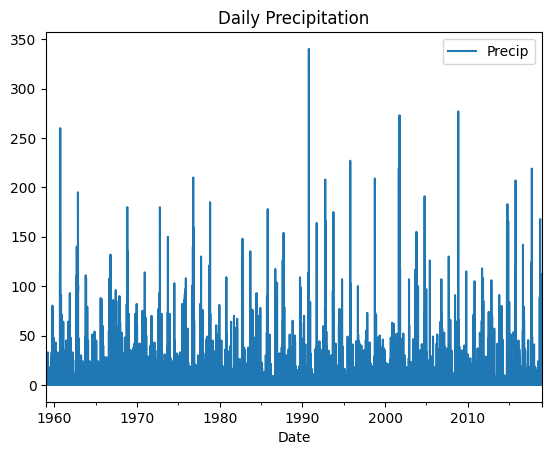

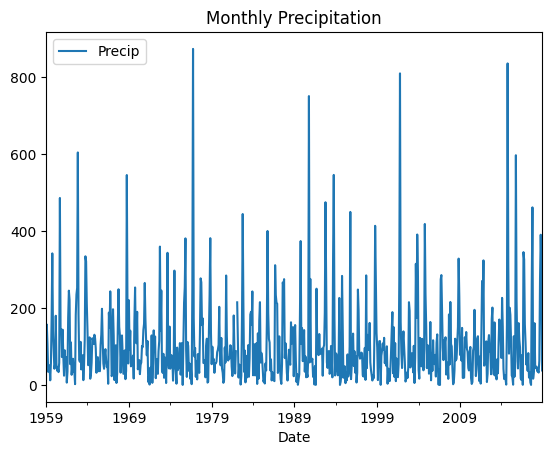

In [92]:
st = 40732

data_daily_st = data_daily.loc[st]
data_daily_st.plot(title="Daily Precipitation")

data_monthly_st = data_monthly.loc[st]
data_monthly_st.plot(title="Monthly Precipitation")

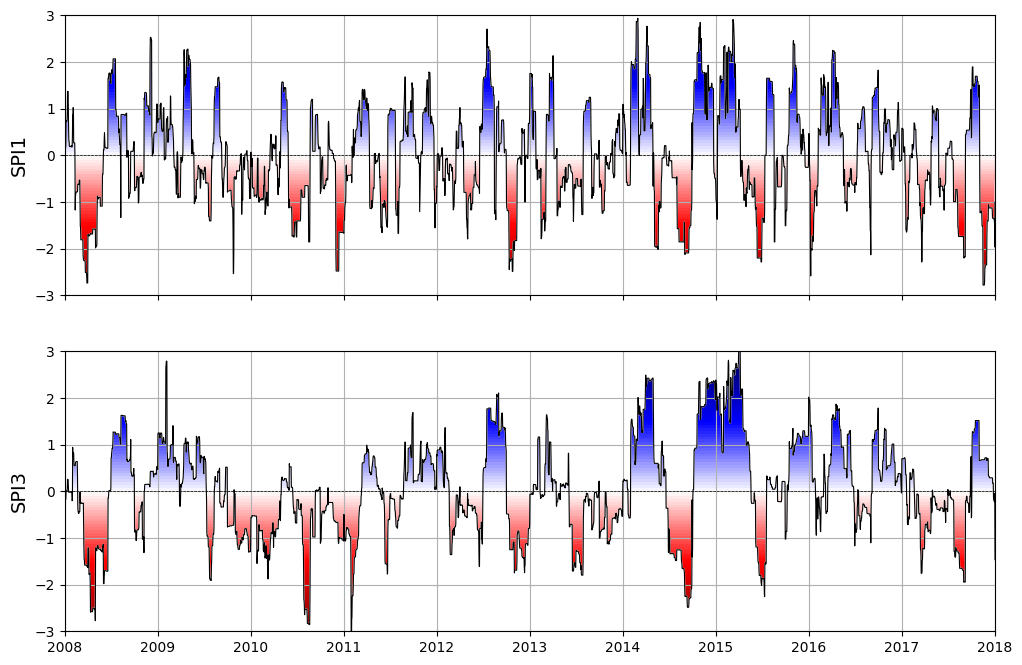

In [96]:
spi1_gamma = si.spi(
    series=data_daily_st,
    dist=scs.gamma,
    prob_zero=True,
    timescale=30
)

spi3_gamma = si.spi(
    series=data_daily_st,
    dist=scs.gamma,
    prob_zero=True,
    timescale=90
)

f, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
si.plot.si(spi1_gamma, ax=ax[0], cmap="seismic_r")
si.plot.si(spi3_gamma, ax=ax[1], cmap="seismic_r")
ax[0].set_xlim(pd.to_datetime(["2008", "2018"]))
[x.grid() for x in ax]
[ax[i].set_ylabel(n, fontsize=14) for i, n in enumerate(["SPI1", "SPI3"])];

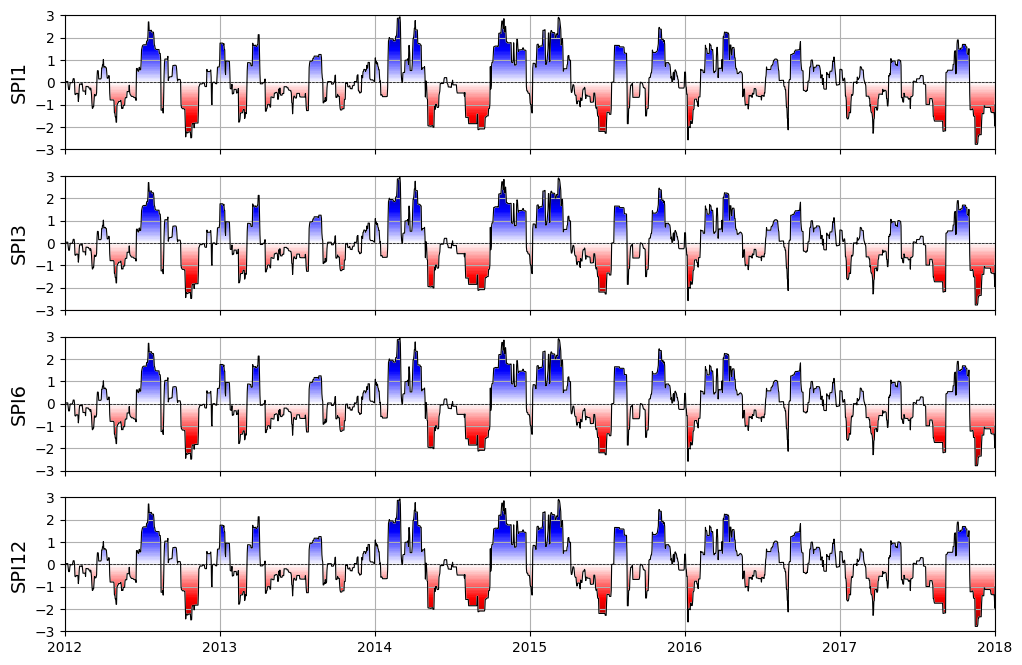

In [56]:
f = 30
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum()
spi1_gamma = si.spi(
    series=series,
    dist=scs.gamma,
    prob_zero=True,
    fit_freq="ME"
)

f, ax = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
si.plot.si(spi1_gamma, ax=ax[0], cmap="seismic_r")
si.plot.si(spi1_gamma, ax=ax[1], cmap="seismic_r")
si.plot.si(spi1_gamma, ax=ax[2], cmap="seismic_r")
si.plot.si(spi1_gamma, ax=ax[3], cmap="seismic_r")
ax[0].set_xlim(pd.to_datetime(["2012", "2018"]))
[x.grid() for x in ax]
[ax[i].set_ylabel(n, fontsize=14) for i, n in enumerate(["SPI1", "SPI3", "SPI6", "SPI12"])];

In [170]:
st = 40736
f = 30
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum().dropna()
spi1_gamma = si.spi(series, dist=scs.gamma, fit_freq="ME")
f = 90
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum().dropna()
spi3_gamma = si.spi(series, dist=scs.gamma, fit_freq="ME")
f = 180
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum().dropna()
spi6_gamma = si.spi(series, dist=scs.gamma, fit_freq="ME")
f = 360
series = data_daily.loc[data_daily.Site == st, "Precip"].rolling(f, min_periods=f).sum().dropna()
spi12_gamma = si.spi(series, dist=scs.gamma, fit_freq="ME")

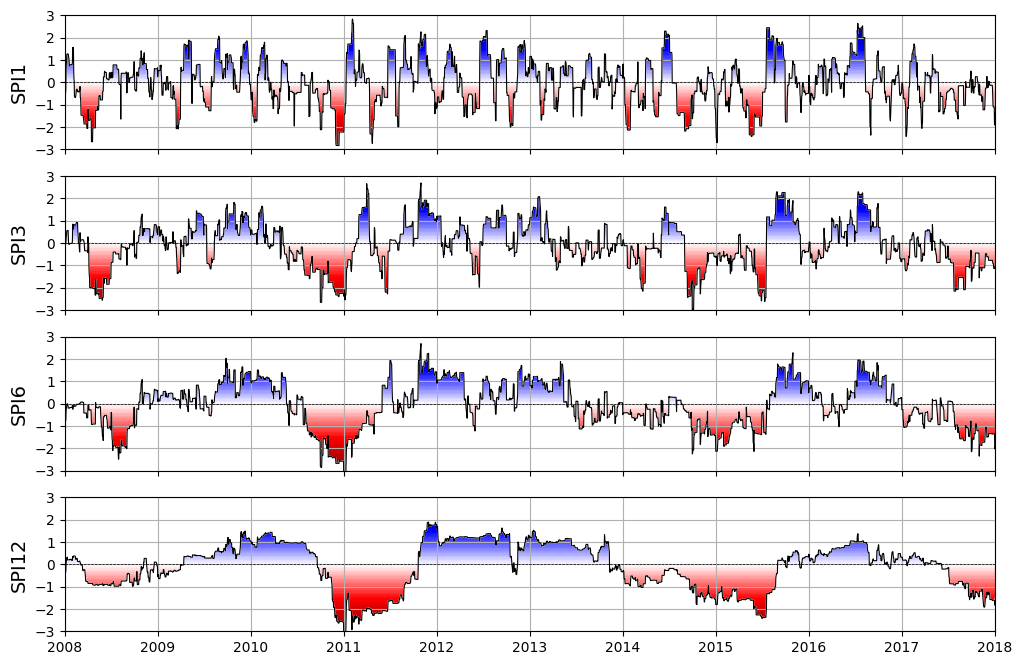

In [172]:
f, ax = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
si.plot.si(spi1_gamma, ax=ax[0], cmap="seismic_r")
si.plot.si(spi3_gamma, ax=ax[1], cmap="seismic_r")
si.plot.si(spi6_gamma, ax=ax[2], cmap="seismic_r")
si.plot.si(spi12_gamma, ax=ax[3], cmap="seismic_r")
ax[0].set_xlim(pd.to_datetime(["2008", "2018"]))
[x.grid() for x in ax]
[ax[i].set_ylabel(n, fontsize=14) for i, n in enumerate(["SPI1", "SPI3", "SPI6", "SPI12"])];